<a href="https://colab.research.google.com/github/arish428/Deep-learning/blob/main/Newwires_topics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
print("train data length",len(train_data))
print("test data length",len(test_data))

train data length 8982
test data length 2246


In [3]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
        return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
        return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [5]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [6]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [7]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [8]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 15s 82ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 0.9990
Epoch 2/20
16/16 [==============================] - 1s 47ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 0.9990
Epoch 3/20
16/16 [==============================] - 1s 47ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 0.9990
Epoch 4/20
16/16 [==============================] - 1s 47ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 0.9990
Epoch 5/20
16/16 [==============================] - 1s 47ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 0.9990
Epoch 6/20
16/16 [==============================] - 1s 47ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 0.9990
Epoch 7/20
16/16 [==============================] - 1s 46ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0038 - val_a

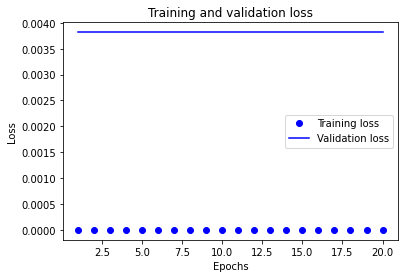

In [9]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

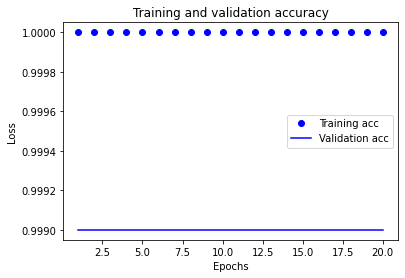

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 67ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 0.9990
Epoch 2/9
16/16 [==============================] - 1s 49ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 0.9990
Epoch 3/9
16/16 [==============================] - 1s 47ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 0.9990
Epoch 4/9
16/16 [==============================] - 1s 46ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 0.9990
Epoch 5/9
16/16 [==============================] - 1s 46ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 0.9990
Epoch 6/9
16/16 [==============================] - 1s 47ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 0.9990
Epoch 7/9
16/16 [==============================] - 1s 47ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy:

In [12]:
results

[0.0017453745240345597, 0.9995547533035278]

In [13]:

import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.17809439002671415

In [14]:
predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [15]:
predictions

array([[0.02210345, 0.02042263, 0.02247176, ..., 0.02006197, 0.01938556,
        0.02192684],
       [0.02173913, 0.02173913, 0.02173913, ..., 0.02173913, 0.02173913,
        0.02173913],
       [0.02173913, 0.02173913, 0.02173913, ..., 0.02173913, 0.02173913,
        0.02173913],
       ...,
       [0.02173913, 0.02173913, 0.02173913, ..., 0.02173913, 0.02173913,
        0.02173913],
       [0.02173913, 0.02173913, 0.02173913, ..., 0.02173913, 0.02173913,
        0.02173913],
       [0.02173913, 0.02173913, 0.02173913, ..., 0.02173913, 0.02173913,
        0.02173913]], dtype=float32)